<a href="https://colab.research.google.com/github/pooya-mohammadi/easy_image_editing/blob/main/easy_image_editing_grounding_dino_glide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Easy Image Editing
Generative AI based image editing/inpainting made super easy to work with.

# Installation

In [ ]:
!pip install -r requirements.txt

### Download the image

In [1]:
from deep_utils import DownloadUtils

image_download_path = "https://github.com/pooya-mohammadi/deep_utils/releases/download/1.0.2/golsa_in_garden.jpg"
DownloadUtils.download_file(image_download_path, exists_skip=True)

'.\\golsa_in_garden.jpg'

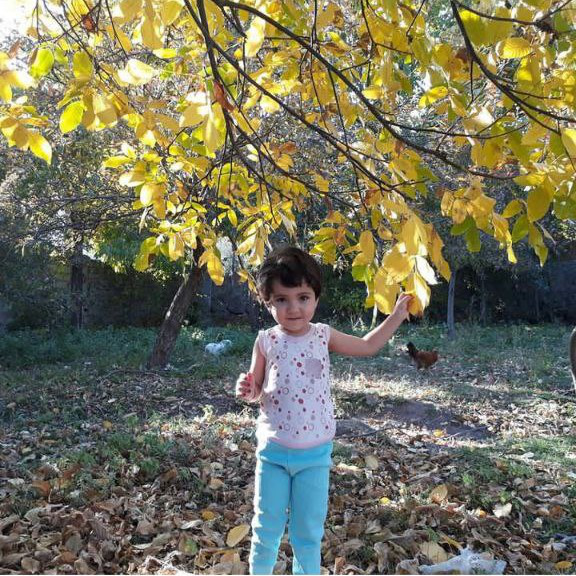

In [2]:
### Visualize Image
from PIL import Image

image_path = "golsa_in_garden.jpg"

pil_img = Image.open(image_path)
pil_img

# Object Selection

In [3]:
# Load model
from deep_utils import Text2BoxVisualGroundingDino

model = Text2BoxVisualGroundingDino()

C:\Users\pooya\miniconda3\envs\torch_gpu\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[INFO] Groundingdino Model loaded successfully!


C:\Users\pooya\miniconda3\envs\torch_gpu\lib\site-packages\torch\utils\checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


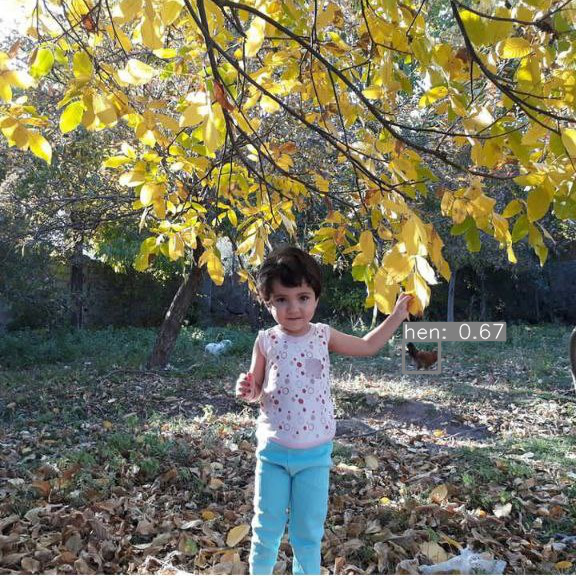

In [4]:
import numpy as np
# Add the description of object you want to replace
text = "Hen"
img = np.asarray(pil_img)
output = model.text_to_box(text, img)
annotate_img = model.annotate(img, output)
pil_annotate_img = Image.fromarray(annotate_img)
pil_annotate_img

## In Painting with GLIDE

### Download Weights
Downloading weights is optional, you can download them or skip and let them to be downloaded by huggingface

In [5]:
from deep_utils import ImageEditingGLIDE
editing_model = ImageEditingGLIDE()

total base parameters 385037638
total upsampler parameters 398368198


In [6]:
# Only the first box is processed. Processing other boxes will be added in the near future!
box = output.boxes[0] 

(576, 576)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

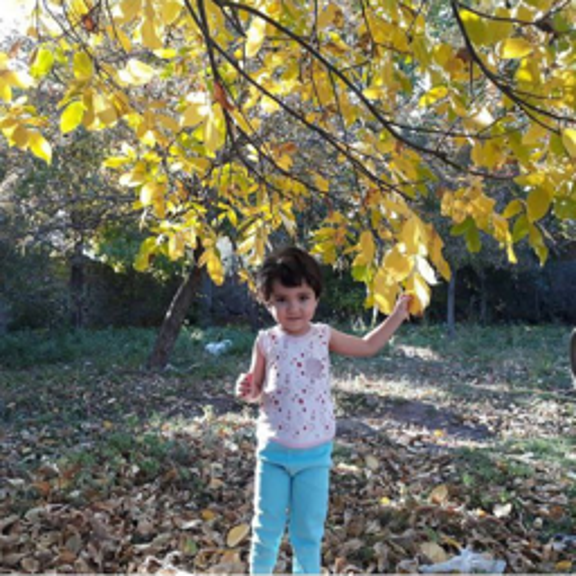

In [10]:
# Add the description you want to replace previous object with
edit_text = "dead gray leaves"
edited_image = editing_model.edit_box(img=pil_img, text=edit_text, box=box)
edited_image = edited_image.resize(pil_img.size)
edited_image.save("glide_output.jpg")
edited_image

## Note:
The resolution is degraded! Working on it!

*_:)_*